목차

[1. OpenCV 기초](#open-cv-기초)
[1.1 ㅇㄴㄹ](#이미지-불러오기-및-저장)
[2. OpenCV 그림그리기](#opencv-그림그리기)

[3. 이미지 프로세싱 기초](#이미지-프로세싱-기초)

### OpenCV 기초
---
#### 이미지 불러오기 및 저장


+ cv2.imread() : 이미지를 numpy배열로 반환

In [2]:
# opencv 이미지 불러오기 및 저장
import cv2

img_file = 'image/jm.jpg' #이미지 경로
save_file = 'image/jm_gray.jpg' #저장경로
#imread(이미지를 읽어서 img에 변수 저장, 회색으로 읽기)
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)

if img is not None:
    cv2.imshow('IMG', img) #제목'IMG'로 읽은 이미지 표시
    cv2.imwrite(save_file, img) #imwrite(저장할 경로, 이미지)
    cv2.waitKey() #키가 입력될 때까지 대기
    cv2.destroyAllWindows() #창 모두 닫기

else: #이미지가 없다면
    print("NO IMAGE FILE.")

#### 동영상 및 카메라 프레임 읽기
---

+ cap = cv2.VideoCapture(file or index)
    - file_path : 동영상 파일 경로
    - index : 카메라 장치 번호, 0번부터  순차적으로 증가
    - cap : VideoCapture 객체
+ ret = cap.isOpened() : 객체 초기화 확인
    - ret : 초기화 여부, True/False
+ ret, img = cap.read() : 영상 프레임 읽기
    - ret : 프레임 읽기 성공/실패, True/False
        * ret값이 False라면, 장치에 문제 or 파일의 끝 도달
    - img : 프레임 이미지, Numpy 배열 또는 None
+ cap.set(id, value) : 프로퍼티 변경
+ cap.get(id) : 프로퍼티 확인
+ cap.release() : 캡처 자원 반납

In [4]:
import cv2
video_file = "image/dog.mp4" #동영상 파일 경로
cap = cv2.VideoCapture(video_file) #동영상 캡처 객체 생성
if cap.isOpened(): #캡처 객체 초기화 확인
    while True:
        ret, img = cap.read() #다음 프레임 읽기
        if ret: #프레임 읽기 정상
            cv2.imshow(video_file, img) # 화면에 표시
            cv2.waitKey(25) # 25ms 지연(40fps로 가정)
        else: #다음 프레임을 읽을 수 없음
            break #재생 완료
else:
    print("can't open video.") # 캡처 객체 초기화 실패
cap.release() # 캡처 자원 반납
cv2.destroyAllWindows()

#### 카메라(웹캠) 프레임 읽기
---

+ cv2.VideoCapture(num) : 원하는 카메라 장치 연결
+ cv2.waitKey()
    - 지정한 대기 시간 동안 키 입력이 없으면 -1 반환
    - -1이 아니라면 아무 키나 입력이 되었다는 뜻

In [5]:
import cv2
cap = cv2.VideoCapture(0) # ① 0번 카메라 장치 연결
if cap.isOpened():
    while True:
        ret, img = cap.read() # 카메라 프레임 읽기
        if ret:
            cv2.imshow('camera', img) # 프레임 이미지 표시
            if cv2.waitKey(1) != -1: # ② 1ms동안 키 입력 대기
                break # 아무 키나 눌렸으면 중지
        else:
            print("no frame")
            break
else:
    print("can't open camera")
cap.release()
cv2.destroyAllWindows()

#### 카메라 비디오 속성 제어
---

##### FPS 조절
+ cv.waitKey()
    + 전달하는 지연 시간은 밀리초(1/1000초)단위
    + 정수만 전달할 수 있으므로 1초를 1000으로 환산해서 정수형으로 변환

- 속성 ID : 'cv2.CAP_PROP_'로 시작하는 상수
    - cv2.CAP_PROP_FRAME_WIDTH : 프레임 폭
    - cv2.CAP_PROP_FRAME_HEIGHT : 프레임 높이
    - cv2.CAP_PROP_FPS : 초당 프레임 수
    - cv2.CAP_PROP_POS_MSEC : 동영상 파일의 프레임 위치(ms)
    - cv2.CAP_PROP_AVI_RATIO : 동영상 파일의 상대 위치(0 : 시작 ,1 : 끝)
    - cv2.CAP_PROP_FOURCC : 동영상 파일 코덱 문자
    - cv2.CAP_PROP_AUTOFOCUS : 카메라 자동 초점 조절
    - cv2.CAP_PROP_ZOOM : 카메라 줌

In [8]:
import cv2
video_file = "image/dog.mp4" #동영상 파일 경로
cap = cv2.VideoCapture(video_file) #동영상 캡처 객체 생성
if cap.isOpened(): #캡처 객체 초기화 확인
    fps = cap.get(cv2.CAP_PROP_FPS) #초당 프레임 수 구하기
    delay = int(1000/fps) #지연 시간 구하기
    print("FPS: %f, Delay: %dms" %(fps, delay))

    while True:
        ret, img = cap.read() #다음 프레임 읽기
        if ret: #프레임 읽기 정상
            cv2.imshow(video_file, img) # 화면에 표시
            cv2.waitKey(delay) # fps에 맞게 시간 지연
        else: #다음 프레임을 읽을 수 없음
            break #재생 완료
else:
    print("can't open video.") # 캡처 객체 초기화 실패
cap.release() # 캡처 자원 반납
cv2.destroyAllWindows()

FPS: 29.905063, Delay: 33ms


##### 픽셀 수 조절

+ 고화질 영상 조절
    + 다음 코드는 카메라가 아닌 동영상 파일 프레임 크기 재지정은 적용되지 않음
+ 프레임의 폭과 높이를 제어해서 픽셀 수 조절
    + cv2.CAP_PROP_FRAME_WIDTH
    + cv2.CAP_PROP_FRAME_HEIGHT

In [9]:
import cv2

cap = cv2.VideoCapture(0) # 카메라 0번 장치 연결
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH) # 프레임 폭 값 구하기
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # 프레임 높이 값 구하기
print("Original width : %d, height : %d" % (width, height))

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320) # 프레임 폭을 320으로 설정
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240) # 프레임 높이를 240으로 설정
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH) # 재지정한 프레임 폭 값 구하기
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # 재지정한 프레임 높이 값 구하기
print("Resize width : %d, height : %d" % (width, height))

if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            cv2.imshow('camera', img)
            if cv2.waitKey(1) != -1:
                break
        else:
            print("no frame!")
            break
else:
    print("can't open camere!")
cap.release()
cv2.destroyAllWindows()

Original width : 640, height : 480
Resize width : 320, height : 240


#### 비디오 파일 저장하기
---

- writer = cv2.VideoWriter(file_path, fourcc, fps, (width, height)) : 비디오 저장 클래스 생성자 함수
    - file_path : 비디오 파일 저장 경로
    - fourcc : 비디오 인코딩 형식 4글자
    - fps : 초당 프레임 수
    - (width, height) : 프레임 폭과 프레임 높이
    - writer : 생성된 비디오 저장 객체
- writer.write(frame) : 프레임 저장
    - frame : 저장할 프레임, Numpy 배열
- writer.set(id, value) : 프로퍼티 변경
- writer.get(id) : 프로퍼티 확인
- ret = writer.fourcc(c1, c2, c3, c4) : fource 코드 생성
    - c1, c2, c3, c4 : 인코딩 형식 4글자, ‘MJPG’, ‘DIVX’ 등
    - ret : fourcc 코드
- cv2.VideoWriter_fourcc(c1, c2, c3, c4) : cv2.VideoWriter.fourcc()와 동일

In [11]:
import cv2
cap = cv2.VideoCapture(0)

if cap.isOpened():
    file_path = "image/recode.avi" #저장할 파일 경로 이름 ①
    fps = 25.40 #FPS, 초당 프레임 수
    fourcc = cv2.VideoWriter_fourcc(*"DIVX") #인코딩 포맷 문자
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    size = (int(width), int(height)) #프레임 크기
    out = cv2.VideoWriter(file_path, fourcc, fps, size) #VideoWriter 객체 생성
    while True:
        ret, frame = cap.read()
        if ret:
            cv2.imshow('camera-recoding', frame)
            out.write(frame) #파일 저장
            if cv2.waitKey(int(1000/fps)) != -1 :
                break
        else:
            print("no frame!")
            break
    out.release()
else:
    print("can't open camera")
cap.release()
cv2.destroyAllWindows()

### OpenCV 그림그리기
---
객체나 얼굴을 인식해서 그 영역에 사각형을 그려 표시한 후, 그 이름을 글씨로 표시하는 등의 용도로 자주 활용

#### 그림판 만들기
+ 그림판 역할을 수행할 이미지 만들기

In [2]:
import cv2
import numpy as np

#(500,500,3)의 배열을 생성하여 모든 요소를 255로 채움
img = np.full((500,500,3),255,dtype = np.uint8)
cv2.imwrite('image/black_500.jpg',img)

True

#### 직선그리기

+ cv2.line(img, start, end, color, [thickness, lineType]) : 직선 그리기
    - img : 그림 그릴 대상 이미지, Numpy 배열
    - start : 선 시작 지점 좌표(x,y)
    - end : 선 끝 지점 좌표(x,y)
    - color : 선 색상,(Blue, Green, Red), 0~255 #일반적으로 웹에서 사용하는 RGB 순서와 반대라는 것이 특징
    - thickness = 1 : 선 두께
    - lineType : 선 그리기 형식
        - cv2.LINE_4 : 4 연결 선 알고리즘
        - cv2.LINE_8 : 8 연결 선 알고리즘
        - cv2.LINE_AA : 안티에일리어싱(계단 현상 없는 선)

In [1]:
import cv2
img = cv2.imread('image/black_500.jpg')

cv2.line(img, (50,50), (150,50),(255,0,0)) # 파란색 1픽셀 선
cv2.line(img, (200,50), (300,50),(0,255,0)) # 초록색 1픽셀 선
cv2.line(img, (350,50), (450,50),(0,0,5)) # 빨간색 1픽셀 선

cv2.line(img, (100,100), (400,100),(255,255,0), 10) # 하늘색 10 픽셀 선
cv2.line(img, (100,150), (400,150),(255,0,255), 10) # 분홍색 10픽셀 선

cv2.line(img, (100,350), (400,400), (0,0,255), 20, cv2.LINE_4) #4연결선
cv2.line(img, (100,400), (400,450), (0,0,255), 20, cv2.LINE_8) #8연결선
cv2.line(img, (100,450), (400,500), (0,0,255), 20, cv2.LINE_AA) #안티에일리어싱 선

cv2.line(img, (0,0), (500,500), (0,0,255)) #이미지 전체에 대각선

cv2.imshow('lines', img)
cv2.imwrite('image/lines.jpg',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<img src = "./image/lines.jpg" height="250px" width="250px">

#### 사각형 그리기

+ cv2.rectangle(img, start, end, color, [thickness, lineType]) : 사각형 그리기
    - img : 그림 그릴 대상 이미지, Numpy 배열
    - start : 사각형 시작 꼭짓점(x,y)
    - end : 사각형 끝 꼭짓점(x,y)
    - color : 색상 (Blue, Green, Red)
    - thickness : 선 두께
        - -1 : 채우기 #선이 아닌 면을 그리는 것이므로 선의 두께를 지시하는 thickness에 -1을 지정하면 사각형 면 전체를 color로
    채우기를 한다
    - lineType : 선 타입, cv2.line() 과 동일

In [1]:
import cv2
img = cv2.imread('image/black_500.jpg')

cv2.rectangle(img, (50,50), (150,150), (255,0,0)) #좌상, 우하 좌표로 사각형 그리기
cv2.rectangle(img, (300,300), (100,100), (0,255,0), 10) #우하, 좌상 좌표로 사각형 그리기
cv2.rectangle(img, (450,200), (200,450), (0,0,255), -1) #우상, 좌하 좌표로 사각형 채워 그리기

cv2.imshow('rectangle', img)
cv2.imwrite('image/rectangle.jpg', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<img src = "./image/rectangle.jpg" height="250px" width="250px">

#### 원, 타원, 호 그리기

+ cv2.circle(img, center, radius, color, [thickness, lineType]) : 원 그리기 함수
    - img : 그림 대상 이미지
    - center : 원점 좌표(x,y)
    - radius : 원의 반지름
    - color : 색상(Blue, Green, Red)
    - thickness : 선 두께(-1 : 채우기)
    - lineType : 선 타입, cv2.line()과 동일
+ cv2.ellipse(img, center, axes, angle, from, to, color, [thickness, lineType]) : 호나 타원 그리기 함수
    - img : 그림 대상 이미지
    - center : 원점 좌표(x,y)
    - axes : 기준 축 길이
    - angle : 기준 축 회전 각도
    - from, to : 호를 그릴 시작 각도와 끝 각도

In [3]:
import cv2
img= cv2.imread('image/black_500.jpg')
#원점(150,150), 반지름 100
cv2.circle(img,(150,150), 100,(255,0,0))
#원점(300,150), 반지름 70
cv2.circle(img,(300,150), 70,(0,255,0),5)
#원점(400,150), 반지름 50, 채우기
cv2.circle(img,(400,150), 50,(0,0,255),-1)

#원점(50,300), 반지름(50), 기준축 회전 각도0,0도부터 360도 그리기
cv2.ellipse(img,(50,300),(50,50),0,0, 360,(0,0,255))
#원점(150,300), 반지름(50), 기준축 회전 각도0,0도부터 180도 그리기
cv2.ellipse(img,(150,300),(50,50),0,0, 180,(255,0,0))
#원점(200,300), 반지름(50), 기준축 회전 각도0, 181도부터 360도 그리기
cv2.ellipse(img,(200,300),(50,50),0, 181, 360,(0,0,255))

#원점(50, 425), 반지름(50,75), 회전 15도
cv2.ellipse(img,(50,425),(50,75), 15,0, 180,(0,0,255))
#원점(200, 425), 반지름(50,75), 회전 45도
cv2.ellipse(img,(200,425),(50,75), 45,0, 360,(0,0,0))

cv2.imshow('circle', img)
cv2.imwrite('image/circle.jpg', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<img src = "./image/circle.jpg" height="250px" width="250px">

#### 글씨 그리기
- cv2.putText(img, text, point, fontFace, fontSize, color, [thickness, lineType])
- img : 글씨를 표시할 이미지
- text : 표시할 문자열
- point : 글씨를 표시할 좌표(좌측 하단 기준)(x,y)
- fontFace : 글꼴
    - cv2.FONT_HERSHEY_PLAIN : 산세리프체 작은 글꼴
    - cv2.FONT_HERSHEY_SIMPLEX : 산세리프체 일반 글꼴
    - cv2.FONT_HERSHEY_DUPLEX : 산세리프체 진한 글꼴
    - cv2.FONT_HERSHEY_COMPLEX_SMALL : 세리프체 작은 글꼴
    - cv2.FONT_HERSHEY_COMPLEX : 산세리프체 일반 글꼴
    - cv2.FONT_HERSHEY_TRIPLEX : 산세리프체 진한 글꼴
    - cv2.FONT_HERSHEY_SCRIPT_SIMPLEX : 필기체 산세리프 글꼴
    - cv2.FONT_HERSHEY_SCRIPT_COMPLEX : 필기체 세리프 글꼴
    - cv2.FONT_ITALIC : 이탤릭체 글꼴
- fontSize : 글꼴 크기
- color, thickness, lineType : cv2.retangle()과 동일


In [7]:
import cv2
img = cv2.imread('image/black_500.jpg')
cv2.putText(img, "PLAIN", (50,30), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,0))
cv2.putText(img, "SIMPLEX", (50,70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0))
cv2.putText(img, "DUPLEX", (50,110), cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,0))
cv2.putText(img, "SIMPLEX2", (200,110), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,250))
cv2.putText(img, "COMPLEX_SMALL", (200,110), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,0,0))

#이 코드는 폰트를 함께 사용하는 방법
cv2.putText(img, "PLAIN | ITALIC", (50,430), cv2.FONT_HERSHEY_PLAIN | cv2.FONT_ITALIC, 1, (0,0,0))
cv2.putText(img, "COMPLEX | ITALIC", (50,470), cv2.FONT_HERSHEY_COMPLEX | cv2.FONT_ITALIC, 1, (0,0,0))

cv2.imshow('draw text', img)
cv2.imwrite('image/draw_text.jpg', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<img src = "./image/draw_text.jpg" height="250px" width="250px">

#### 창관리
한 개 이상의 이미지를 여러 창에 띄우거나 각 창에 키보드와 마우스를 처리하려면 창을 관리하는 기능이 필요
- cv2.namedWindow(title, [option]) : 이름을 갖는 창 열기
    - title : 창 이름, 제목 줄에 표시
    - option : 창 옵션, ‘cv2.WINDOW_’로 시작
        - cv2.WINDOW_NORMAL : 임의의 크기, 사용자 창 크기 조정 가능
        - cv2.WINDOW_AUTOSIZE : 이미지와 같은 크기, 창 크기 재조정 불가능
- cv2.moveWindow(title, x, y) : 창 위치 이동
    - title : 위치를 변경할 창의 이름
    - x, y : 이동할 창의 위치
- cv2.resizeWindow(title, width, height) : 창 크기 변경
    - title : 크기를 변경할 창의 이름
    - width, height : 크기를 변경할 창의 폭과 높이
- cv2.destoryWindow(title) : 창 닫기
    - title : 닫을 대상 창 이름
- cv2.destoryAllWindows() : 열린 모든 창 닫기

In [1]:
import cv2
file_path = 'image/jm.jpg'
img = cv2.imread(file_path) #이미지를 기본값으로 읽기
img_gray = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) #이미지를 그레이 스케일로 읽기

cv2.namedWindow('origin', cv2.WINDOW_AUTOSIZE) #origin 이라는 이름으로 창 생성
cv2.namedWindow('gray', cv2.WINDOW_NORMAL) #gray라는 이름으로 창 생성

cv2.imshow('origin', img) #origin 창에 이미지 표시
cv2.imshow('gray', img_gray) #gray 창에 이미지 표시

cv2.moveWindow('origin', 0, 0) #창 위치 변경
cv2.moveWindow('gray', 100, 100) #창 위치 변경

cv2.waitKey(0)
cv2.resizeWindow('origin', 200, 200) #창 크기 변경(아직 변경 안됨)
cv2.resizeWindow('gray', 100, 100) #창 크기 변경(변경됨)

cv2.waitKey(0)
cv2.destroyWindow('gray') #아무 키나 누르면 gray 창 닫기

cv2.waitKey(0)
cv2.destroyAllWindows() #아무 키나 누르면 창 전체 닫기

### 이미지 프로세싱 기초
---

#### 직접 관심영역 지정

In [18]:
import cv2
import numpy as np

img = cv2.imread('image/jm.jpg')

x = 110; y = 132; w = 20; h = 20 #roi 좌표
roi = img[y : y+h, x : x+w] #①roi 지정
img2 = roi.copy()

cv2.rectangle(roi, (0,0), (h-1, w-1), (0,255,0)) #②roi에 사각형 그리기

cv2.imshow("img", img)
cv2.imshow('roi', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### 마우스로 관심영역 지정

In [21]:
import cv2
import numpy as np

isDragging = False #마우스 드래그 상태 저장
x0, y0, w, h = -1, -1, -1, -1 #영역 선택 좌표 저장
blue, red = (255,0,0), (0,0,255) #색상 값

def onMouse(event, x, y, flags, param): #①마우스 이벤트 핸들 함수
    global isDragging, x0, y0, img #전역변수 참조
    if event == cv2.EVENT_LBUTTONDOWN: #②왼쪽 마우스 버튼 다운, 드래그 시작
        isDragging = True
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE: #③마우스 움직임
        if isDragging: #드래그 진행중
            img_draw = img.copy() #사각형 그림 표현을 위한 이미지 복제
            cv2.rectangle(img_draw, (x0, y0), (x,y), blue, 2) #드레그 진행 영역 표시
            cv2.imshow('img', img_draw) #사각형으로 표시된 그림 화면 출력
    elif event == cv2.EVENT_LBUTTONUP: #④왼쪽 마우스 버튼업
        if isDragging: #드래그 중지
            isDragging = False
            w = x - x0 #드래그 영역 폭 계산
            h = y - y0 #드레그 영역 높이 계산
            print("x:%d, y:%d, w:%d, h:%d" % (x0,y0,w,h))
            if w > 0 and h > 0: #폭과 높이가 음수이면 드래그 방향이 옳음
                img_draw = img.copy() #선택 영역에 사각형 그림을 표시할 이미지 복제
                # 선택 영역에 빨간색 사각형 표시
                cv2.rectangle(img_draw,(x0, y0), (x,y), red, 2)
                cv2.imshow('img', img_draw) #빨간색 사각형이 그려진 이미지 화면 출력
                roi = img[y0:y0+h, x0:x0+w] #원본 이미지에서 선택 영역만 ROI로 지정
                cv2.imshow('cropped', roi) #ROI 지정 영역을 새 창으로 표시
                cv2.moveWindow('cropped', 0,0) #새 창을 화면 좌측 상단으로 이동
                cv2.imwrite('image/cropped.jpg', roi)# ROI 영역만 파일로 저장
                print('cropped.')
            else:
                cv2.imshow('img',img)
                print("좌측 상단에서 우측 하단으로 영역을 드레그 해주세요.")
img = cv2.imread('image/jm.jpg')
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse) #마우스 이벤트 등록
cv2.waitKey()
cv2.destroyAllWindows()

x:102, y:131, w:30, h:19
cropped.
x:151, y:184, w:22, h:14
cropped.
x:98, y:132, w:33, h:17
cropped.


#### 컬러 스페이스

+ RGB(행, 열, 채널)
+ RGBA(행, 열, 채널, 투명도)
    + 전경은 255, 배경은 0의 값을 가짐
    + mask channel이라고도 부름

In [5]:
import cv2
import numpy as np
img = cv2.imread('image/puppy.jpg') #기본 값 옵션
bgr = cv2.imread('image/puppy.jpg', cv2.IMREAD_COLOR) #IMREAD_COLOR 옵션
bgra = cv2.imread('image/puppy.jpg', cv2.IMREAD_UNCHANGED)
#각 옵션에 따른 이미지 SHAPE
print("default :", img.shape, "color:", bgr.shape, "unchanged:", bgra.shape)

cv2.imshow("bgr", bgr)
cv2.imshow("bgra", bgra)
cv2.imshow('alpha', bgra[:,:,3]) #알파 채널만 표시
cv2.waitKey(0)
cv2.destroyAllWindows()

default : (464, 410, 3) color: (464, 410, 3) unchanged: (464, 410, 4)


#### 컬러스페이스 변환

+ cv2.cvtColor() : 이미지를 그레이 스케일이나 다른 컬러 스페이스로 변환

In [ ]:
import cv2
import numpy as np

img = cv2.imread('image/puppy.jpg')
#dtype이 unit8인 경우, 평균값을 구하는 과정에서
#3개의 값을 합하면 255보다 큰 값이 나올 수 있으므로 변경
img2 = img.astype(np.uint16) #dtype 변경
b,g,r = cv2.split(img) #채널별로 분리
#정확한 명암을 얻기에 평균값은 부족한 면이 있음
gray1 = ((b + g + r)/3).astype(np.uint8) #평균 값 연산 후 dtype 변경

#위의 문제를 cv2.cvtColor() 함수가 더 정교하게 해결
gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #BGR을 그레이 스케일로 변경
cv2.imshow('original', img)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 스레시홀딩(Thresholding)

127.0


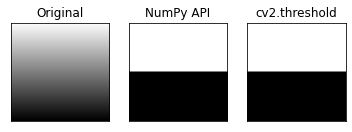

In [6]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('image/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE) #이미지를 그레이 스케일로 읽기
# NumPy API로 바이너리 이미지 만들기
thresh_np = np.zeros_like(img) # 원본과 동일한 크기의 0으로 채워진 이미지
thresh_np[ img > 127] = 255 # 127 보다 큰 값만 255로 변경

# OpenCV API로 바이너리 이미지 만들기
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) # 변환할 이미지, 경계값, 경계값 기준에 만족하는 픽셀에 적용할 값
print(ret) # 127.0, 바이너리 이미지에 사용된 문턱 값 반환 , 픽셀 값이 경계값을 넘으면 value를 지정하고, 넘지 못하면 0

# 원본과 결과물을 matplotlib으로 출력
imgs = {'Original': img, 'NumPy API':thresh_np, 'cv2.threshold': thresh_cv}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])
plt.show()

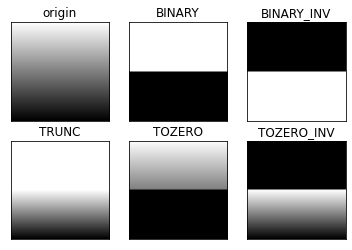

In [7]:
import cv2
import numpy as np
import matplotlib.pylab as plt
img = cv2.imread('image/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE)
_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'origin': img, 'BINARY': t_bin, 'BINARY_INV': t_bininv, \
'TRUNC': t_truc, 'TOZERO': t_2zr, 'TOZERO_INV': t_2zrinv}

for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2, 3, i + 1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]);
    plt.yticks([])
plt.show()